# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')


# Reading Data

In [3]:
df = pd.read_csv("car_evaluation.csv", header=None)
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
display("size of the dataset:", df.shape)
display("data types:", df.dtypes)

'size of the dataset:'

(1728, 7)

'data types:'

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

# EDA

In [9]:
df.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


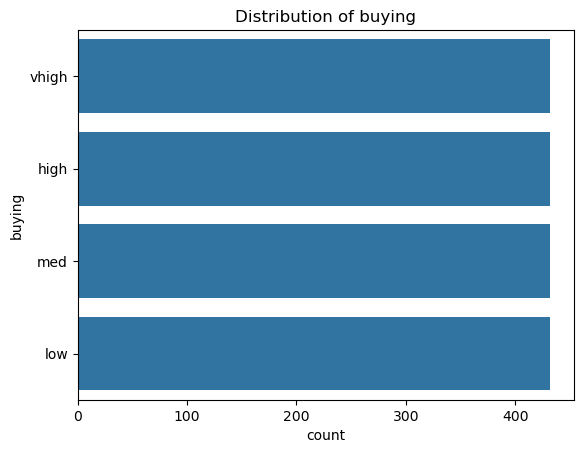

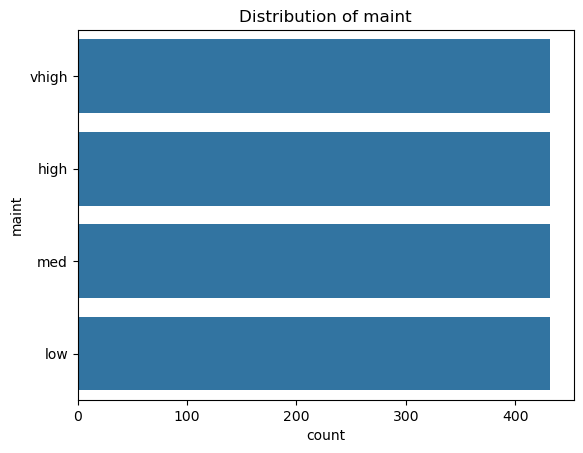

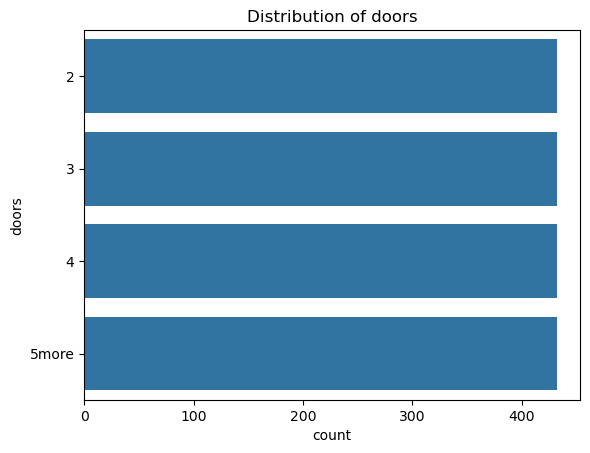

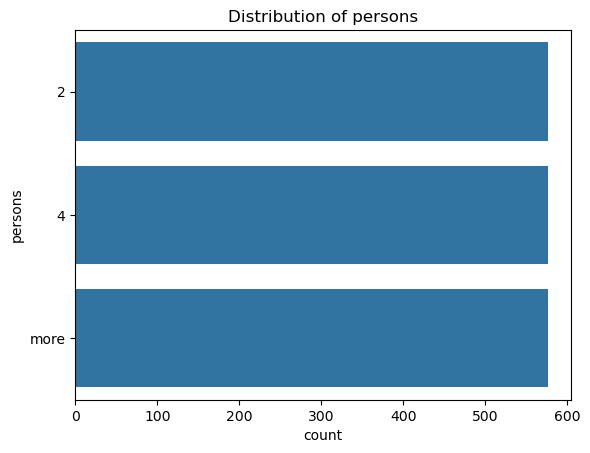

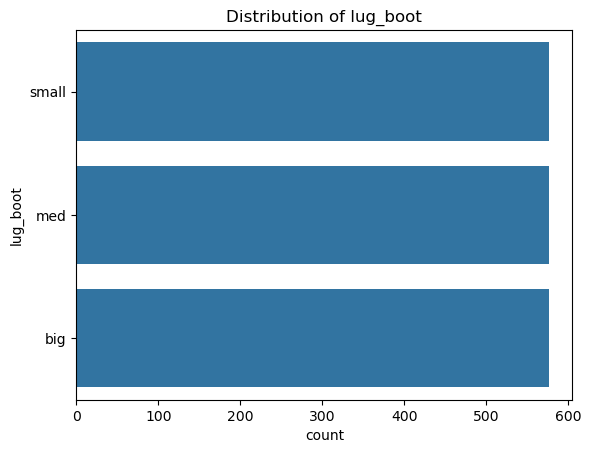

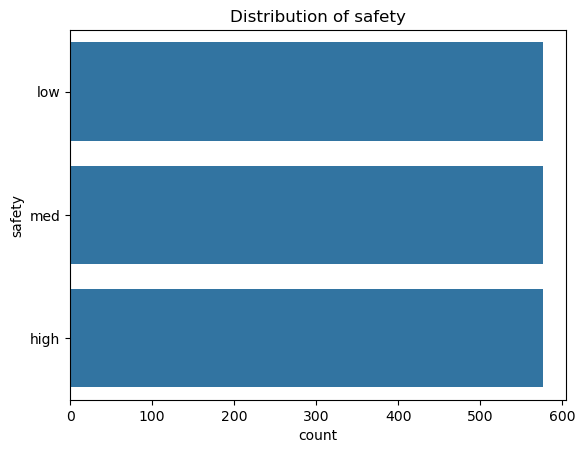

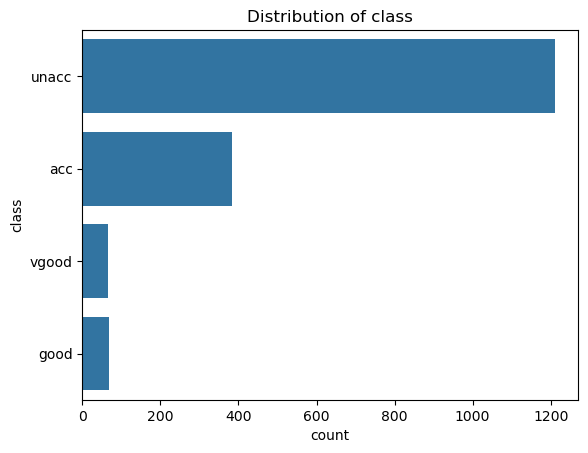

In [11]:
def plot_bar(df):
    #fig = plt.figure(figsize = (7, 6))
    for i in df.columns:
        plt.subplot(1,1,1)
        sns.countplot(df[i])
        plt.title(f"Distribution of {i}")
        plt.show()

plot_bar(df)

# **Pre-processing**

In [14]:
# check for missing values
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# **Label Encoding**

##### 4 features (buying, maint, lug_boot, class) have an order in data, so, we can use ordinal encoding for it. Features like doors and persons has only one categorical variable, which can be changed to a number without encoding the whole column. Label encoding can be applied to Class column

In [18]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Ordinal Encoding
ordinal_features = ['buying', 'maint', 'lug_boot', 'safety']
ordinal_encoder = OrdinalEncoder()
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

# Label Encoding for 'class'
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Change values for doors and persons
df['doors'] = df['doors'].replace('5more', 5).astype(int)
df['persons'] = df['persons'].replace('more', 5).astype(int)

df.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class
1579,1.0,2.0,4,4,1.0,2.0,1
739,0.0,2.0,5,4,2.0,2.0,2
1197,2.0,1.0,2,4,2.0,1.0,2
1189,2.0,1.0,2,2,2.0,2.0,2
754,0.0,2.0,5,5,0.0,2.0,0


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
buying,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
maint,1728.0,1.500000,1.118358,0.0,0.75,1.5,2.25,3.0
doors,1728.0,3.500000,1.118358,2.0,2.75,3.5,4.25,5.0
persons,1728.0,3.666667,1.247580,2.0,2.00,4.0,5.00,5.0
lug_boot,1728.0,1.000000,0.816733,0.0,0.00,1.0,2.00,2.0
safety,1728.0,1.000000,0.816733,0.0,0.00,1.0,2.00,2.0
class,1728.0,1.553241,0.875948,0.0,1.00,2.0,2.00,3.0


#### all feature values are in similar range, so, we do not need to do normalization

# Splitting Data

In [24]:
X = df.drop(columns=['class'])
Y = df['class']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2 ,random_state =1)
print("size of the training dataset:", x_train.shape[0])
print("size of the training labels:", y_train.shape[0])
print("size of the testing dataset:", x_test.shape[0])
print("size of the testing labels:", y_test.shape[0])

size of the training dataset: 1382
size of the training labels: 1382
size of the testing dataset: 346
size of the testing labels: 346


# Logistic Regression

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Initialize the Logistic Regression model
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000))

# Train the model on the training data
pipe.fit(x_train, y_train)

# Make predictions on the test set
y_pred1 = pipe.predict(x_test)

# Calculate and print accuracy on the test set
print(f"Logistic Regression test set accuracy is : {round(accuracy_score(y_test, y_pred1) * 100, 2)} %")

# Perform 5-fold cross-validation on the training data
k = 5
cv_scores = cross_val_score(pipe, x_train, y_train, cv=k, scoring='accuracy')

# Calculate the mean accuracy across the 5 folds
mean_cv_accuracy = round(cv_scores.mean() * 100, 2)

# Print cross-validation accuracy
print(f"Logistic Regression cross-validation accuracy with k={k} is: {mean_cv_accuracy} %")


Logistic Regression test set accuracy is : 71.97 %
Logistic Regression cross-validation accuracy with k=5 is: 67.0 %


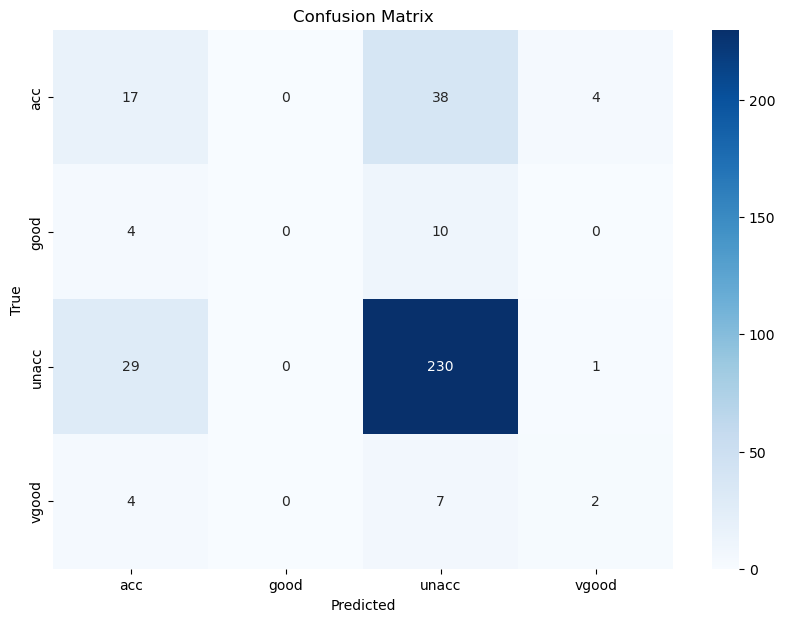

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred1)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import classification_report
# Get the actual label names
label_names = label_encoder.inverse_transform([0, 1, 2, 3])

# Print classification report with actual label names
print(classification_report(y_test, y_pred1, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.31      0.29      0.30        59
        good       0.00      0.00      0.00        14
       unacc       0.81      0.88      0.84       260
       vgood       0.29      0.15      0.20        13

    accuracy                           0.72       346
   macro avg       0.35      0.33      0.34       346
weighted avg       0.67      0.72      0.69       346



#### our dataset has inbalanced labels. So, using 'accuracy' metric is not the best metric for this problem, as it will mislead us, beliving we have a good model. F1-score would be better metric for this problem

# Decision Trees

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree Classifier

pipe1 = make_pipeline(StandardScaler(), DecisionTreeClassifier())
# Train the model on the training data
pipe1.fit(x_train, y_train)

# Make predictions on the test set
y_pred2 = pipe1.predict(x_test)

# Calculate and print accuracy on the test set
print(f"Decision Tree test set accuracy is : {round(accuracy_score(y_test, y_pred2) * 100, 2)} %")

# Perform 5-fold cross-validation on the training data
k = 5
cv_scores = cross_val_score(pipe1, x_train, y_train, cv=k, scoring='accuracy')

# Calculate the mean accuracy across the 5 folds
mean_cv_accuracy = round(cv_scores.mean() * 100, 2)

# Print cross-validation accuracy
print(f"Decision Tree cross-validation accuracy with k={k} is: {mean_cv_accuracy} %")


Decision Tree test set accuracy is : 96.82 %
Decision Tree cross-validation accuracy with k=5 is: 97.54 %


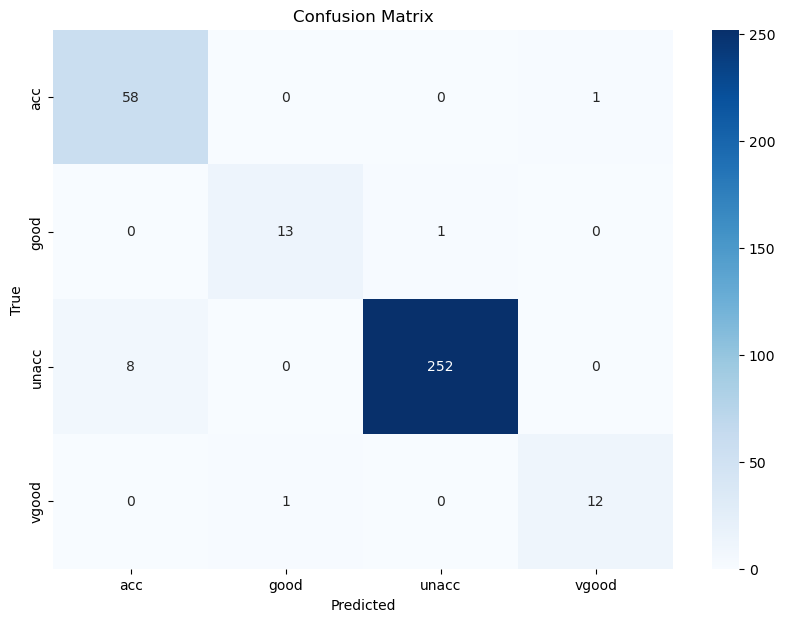

In [37]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred2)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.metrics import classification_report
# Get the actual label names
label_names = label_encoder.inverse_transform([0, 1, 2, 3])

# Print classification report with actual label names
print(classification_report(y_test, y_pred2, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.88      0.98      0.93        59
        good       0.93      0.93      0.93        14
       unacc       1.00      0.97      0.98       260
       vgood       0.92      0.92      0.92        13

    accuracy                           0.97       346
   macro avg       0.93      0.95      0.94       346
weighted avg       0.97      0.97      0.97       346



# SVM


In [42]:
pipe3 = make_pipeline(StandardScaler(), SVC(max_iter=3000))
pipe3.fit(x_train, y_train)
# Predict on test set with SVM
y_pred_svm = pipe3.predict(x_test)

# Calculate and print accuracy on test set for SVM
svm_test_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
print(f"SVM test set accuracy is: {svm_test_accuracy} %")

SVM test set accuracy is: 91.62 %


In [44]:
# Perform 5-fold cross-validation for SVM
k = 5
svm_cv_scores = cross_val_score(pipe3, x_train, y_train, cv=k, scoring='accuracy')
svm_mean_cv_accuracy = round(svm_cv_scores.mean() * 100, 2)
print(f"SVM cross-validation accuracy with k={k} is: {svm_mean_cv_accuracy} %\n")


SVM cross-validation accuracy with k=5 is: 89.07 %



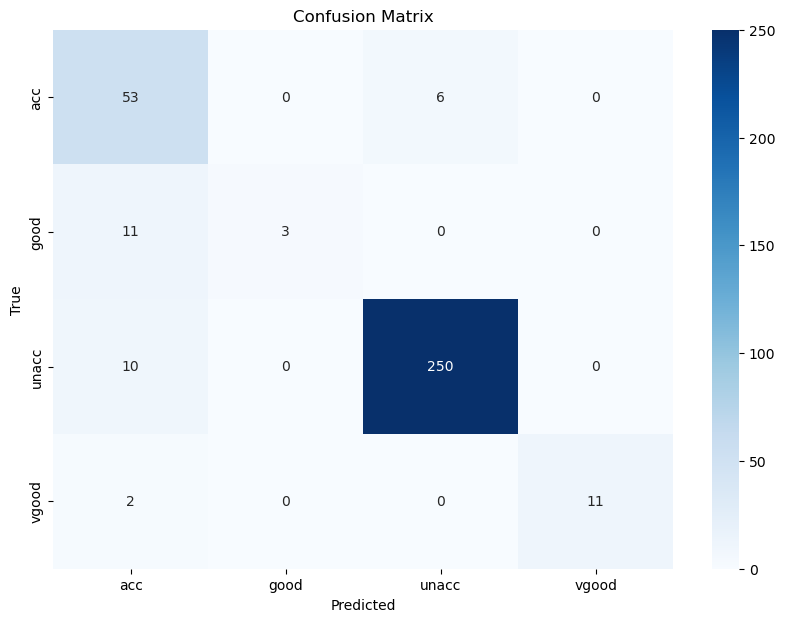

In [46]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.metrics import classification_report
# Get the actual label names
label_names = label_encoder.inverse_transform([0, 1, 2, 3])

# Print classification report with actual label names
print(classification_report(y_test, y_pred_svm, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.70      0.90      0.79        59
        good       1.00      0.21      0.35        14
       unacc       0.98      0.96      0.97       260
       vgood       1.00      0.85      0.92        13

    accuracy                           0.92       346
   macro avg       0.92      0.73      0.76       346
weighted avg       0.93      0.92      0.91       346



# MLPC

In [51]:
pipe4 = make_pipeline(StandardScaler(),MLPClassifier(max_iter=3000, hidden_layer_sizes=100, random_state=1))

pipe4.fit(x_train, y_train)
y_pred_mlp = pipe4.predict(x_test)

In [52]:
mlp_test_accuracy = round(accuracy_score(y_test, y_pred_mlp) * 100, 2)
print(f"MLP test set accuracy is: {mlp_test_accuracy} %")

# Perform 5-fold cross-validation for MLP
mlp_cv_scores = cross_val_score(pipe4, x_train, y_train, cv=k, scoring='accuracy')
mlp_mean_cv_accuracy = round(mlp_cv_scores.mean() * 100, 2)
print(f"MLP cross-validation accuracy with k={k} is: {mlp_mean_cv_accuracy} %\n")

MLP test set accuracy is: 98.55 %
MLP cross-validation accuracy with k=5 is: 98.48 %



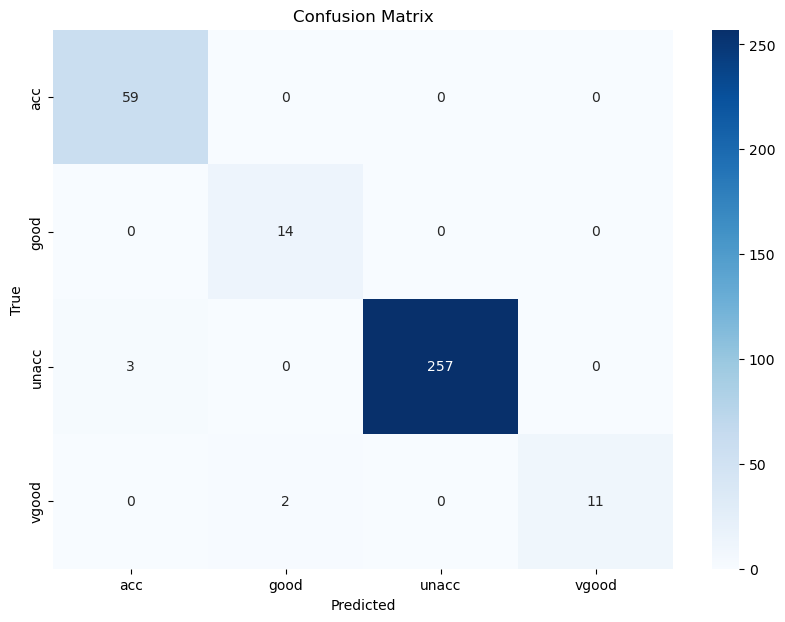

In [53]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
from sklearn.metrics import classification_report
# Get the actual label names
label_names = label_encoder.inverse_transform([0, 1, 2, 3])

# Print classification report with actual label names
print(classification_report(y_test, y_pred_mlp, target_names=label_names))

              precision    recall  f1-score   support

         acc       0.95      1.00      0.98        59
        good       0.88      1.00      0.93        14
       unacc       1.00      0.99      0.99       260
       vgood       1.00      0.85      0.92        13

    accuracy                           0.99       346
   macro avg       0.96      0.96      0.95       346
weighted avg       0.99      0.99      0.99       346



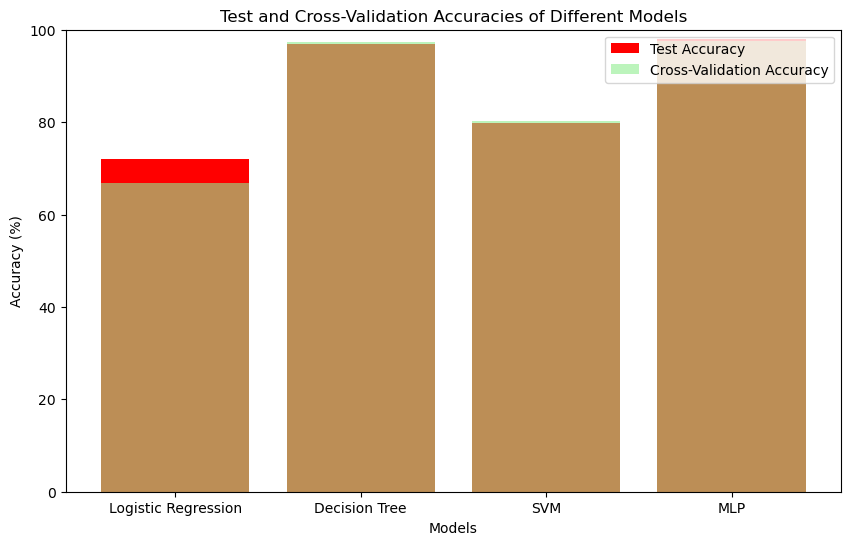

In [64]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Dictionary to store models and their names
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(max_iter=3000),
    "MLP": MLPClassifier(hidden_layer_sizes=(100,), max_iter=3000, random_state=1)
}

# 1. Test and Cross-Validation Accuracy Comparison
accuracies = {}

for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predict and calculate test accuracy
    y_pred = model.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Cross-validation accuracy
    cv_accuracy = round(cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy').mean() * 100, 2)

    accuracies[name] = {"Test Accuracy": test_accuracy, "CV Accuracy": cv_accuracy}

# Plot Test and CV Accuracies
test_acc = [accuracies[model]["Test Accuracy"] for model in accuracies]
cv_acc = [accuracies[model]["CV Accuracy"] for model in accuracies]
model_names = list(accuracies.keys())

plt.figure(figsize=(10, 6))
plt.bar(model_names, test_acc, color='red', label="Test Accuracy")
plt.bar(model_names, cv_acc, color='lightgreen', alpha=0.6, label="Cross-Validation Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Test and Cross-Validation Accuracies of Different Models")
plt.legend()
plt.ylim(0, 100)
plt.show()



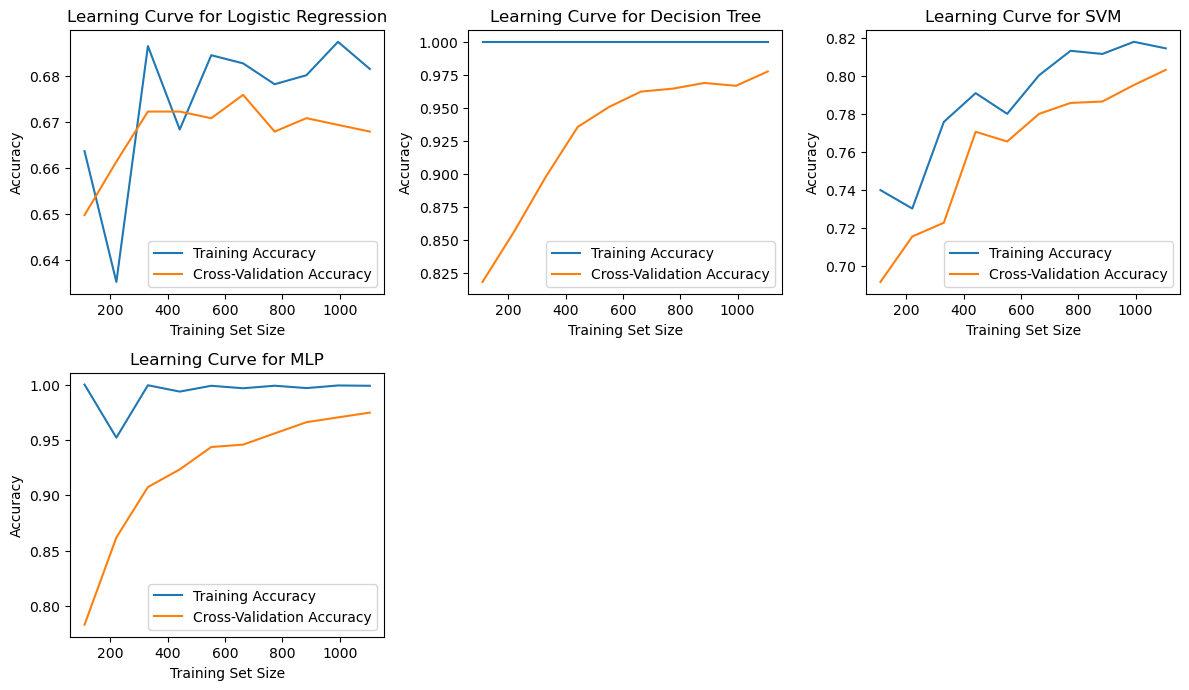

In [70]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
plt.figure(figsize=(12, 10))

for i, (name, model) in enumerate(models.items(), 1):
    train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.subplot(3, 3, i)
    plt.plot(train_sizes, train_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_mean, label="Cross-Validation Accuracy")
    plt.title(f"Learning Curve for {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()

plt.tight_layout()
plt.show()


In [58]:
from sklearn.metrics import f1_score

# Logistic Regression F1 Score
f1_logistic = f1_score(y_test, y_pred1, average='weighted')
print(f"Logistic Regression F1 Score (Weighted): {f1_logistic}")

# Decision Tree F1 Score
f1_decision_tree = f1_score(y_test, y_pred2, average='weighted')
print(f"Decision Tree F1 Score (Weighted): {f1_decision_tree}")

# SVM F1 Score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM F1 Score (Weighted): {f1_svm}")

# MLP F1 Score
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
print(f"MLP F1 Score (Weighted): {f1_mlp}")

Logistic Regression F1 Score (Weighted): 0.6930686522363706
Decision Tree F1 Score (Weighted): 0.9687589493966129
SVM F1 Score (Weighted): 0.9107565131771816
MLP F1 Score (Weighted): 0.9855832929308741


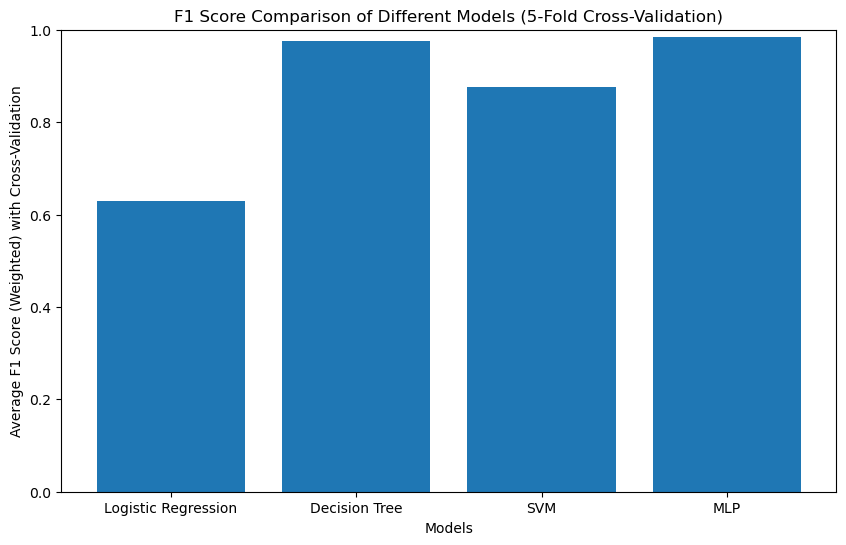

In [59]:
from sklearn.model_selection import cross_val_score

# Define the models again for clarity
models = {
    "Logistic Regression": pipe,  # Assuming 'pipe' was created for logistic regression
    "Decision Tree": pipe1,
    "SVM": pipe3,
    "MLP": pipe4
}

# Number of folds for cross-validation
k = 5
f1_scores_cv = {}

# Calculate F1 scores with k-fold cross-validation for each model
for name, model in models.items():
    f1_score_cv = cross_val_score(model, x_train, y_train, cv=k, scoring='f1_weighted')
    f1_scores_cv[name] = f1_score_cv.mean()  # Take the average F1 score across folds

# Visualization
model_names = list(f1_scores_cv.keys())
scores = list(f1_scores_cv.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, scores)
plt.xlabel("Models")
plt.ylabel("Average F1 Score (Weighted) with Cross-Validation")
plt.title(f"F1 Score Comparison of Different Models ({k}-Fold Cross-Validation)")
plt.ylim(0, 1)
plt.show()


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(hidden_layer_sizes=100, max_iter=100, random_state=1)
}

# Dictionary to store results
results = {}

# Perform training, prediction, and cross-validation for each model
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Test set accuracy
    y_pred = model.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    
    # 5-fold cross-validation accuracy
    k = 5
    cv_accuracy = round(cross_val_score(model, x_train, y_train, cv=k, scoring='accuracy').mean() * 100, 2)
    
    # Store both accuracies
    results[name] = {"Test Accuracy": test_accuracy, "CV Accuracy": cv_accuracy}

# Print all accuracies
for model_name, accuracy in results.items():
    print(f"{model_name}:")
    print(f"  Test Accuracy: {accuracy['Test Accuracy']}%")
    print(f"  Cross-Validation (5-fold) Accuracy: {accuracy['CV Accuracy']}%\n")


Logistic Regression:
  Test Accuracy: 71.97%
  Cross-Validation (5-fold) Accuracy: 66.79%

Decision Tree:
  Test Accuracy: 96.82%
  Cross-Validation (5-fold) Accuracy: 97.83%

SVM:
  Test Accuracy: 79.77%
  Cross-Validation (5-fold) Accuracy: 80.32%

MLP:
  Test Accuracy: 84.1%
  Cross-Validation (5-fold) Accuracy: 77.93%

